# Boston Traffic Stop Analysis
By. Andrew Simmons & Ethan Smith

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [80]:
"""Load data and filter"""

dataset = pd.read_csv('data/boston-police-department-fio.csv')
dataset.replace('NO DATA ENTERED', np.NaN, inplace=True)

In [12]:
dataset.columns

Index(['SEQ_NUM', 'FIO_ID', 'SEX', 'LOCATION', 'DIST', 'DIST_ID', 'FIO_DATE',
       'FIO_TIME', 'PRIORS', 'DESCRIPTION', 'CLOTHING', 'COMPLEXION',
       'FIOFS_TYPE', 'TERRORISM', 'SEARCH', 'BASIS', 'STOP_REASONS',
       'ENTEREDBY', 'FIOFS_REASONS', 'OUTCOME', 'VEH_MAKE', 'VEH_YEAR_NUM',
       'VEH_COLOR', 'VEH_MODEL', 'VEH_OCCUPANT', 'VEH_STATE', 'SUPERVISOR_ID',
       'OFFICER_ID', 'SUPERVISOR', 'OFF_DIST_ID', 'OFF_DIST', 'OFFICER',
       'SUP_ENTRYDATE', 'LAST_UPDATEBY', 'LAST_UPDATETIME', 'ETHNICITY',
       'FIRST_INSERTTIME', 'ACTIVE_ID', 'RACE_ID', 'RACE_DESC',
       'FIO_DATE_CORRECTED', 'AGE_AT_FIO_CORRECTED', 'STREET_ID', 'CITY'],
      dtype='object')

In [46]:
dataset['RACE_DESC'].unique()

array(['B(Black)', 'W(White)', nan, 'UNKNOWN', 'H(Hispanic)',
       'I(American Indian or Alaskan Native)',
       'A(Asian or Pacific Islander)', 'M(Middle Eastern or East Indian)'],
      dtype=object)

## Data Visualization

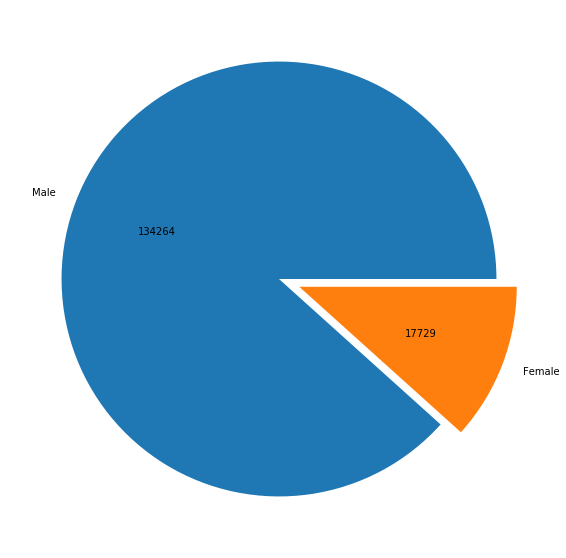

In [96]:
"""Sex Distibution"""

males = len(dataset[dataset['SEX'] == 'MALE'].index)
females = len(dataset[dataset['SEX'] == 'FEMALE'].index)

sexes = ['Male', 'Female']
counts = np.array([males, females])

def absolute_value(val):
    return counts[np.abs(counts - val / 100.0 * counts.sum()).argmin()]

fig, ax = plt.subplots()
fig.set_size_inches((10, 10))

sex_distribution = plt.pie(counts,
                           explode=[0, 0.1],
                           labels=sexes,
                           autopct=absolute_value)

In [82]:
subset = dataset[['RACE_DESC', 'SEX', 'PRIORS']]
features = subset[['RACE_DESC', 'SEX']]
labels = subset['PRIORS']

print(type(features))
print(features)
print(features.iloc[:, 1])

label_encoder = preprocessing.LabelEncoder()
for i in range(features.shape[1]):
    features.iloc[:, i] = label_encoder.fit_transform(features.iloc[:, i])
    print(features)

# X_train, X_test, y_train, y_test = train_test_split(subset[['RACE_DESC', 'SEX']],
#                                                     subset[['PRIORS']],
#                                                     test_size=0.33,
#                                                     random_state=42)


# model = tree.DecisionTreeClassifier()
# model.fit(X_train, y_train)
# pred = model.predict(X_test)

# accuracy_score(y_test, pred)

<class 'pandas.core.frame.DataFrame'>
          RACE_DESC   SEX
0          B(Black)  MALE
1          W(White)  MALE
2          B(Black)  MALE
3          B(Black)  MALE
4          B(Black)  MALE
...             ...   ...
152225     B(Black)  MALE
152226          NaN  MALE
152227     B(Black)  MALE
152228  H(Hispanic)  MALE
152229     B(Black)  MALE

[152230 rows x 2 columns]
0         MALE
1         MALE
2         MALE
3         MALE
4         MALE
          ... 
152225    MALE
152226    MALE
152227    MALE
152228    MALE
152229    MALE
Name: SEX, Length: 152230, dtype: object


TypeError: argument must be a string or number